<a href="https://colab.research.google.com/github/doaa450/Churn-prediction/blob/main/CLTV_Regression_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Table of Contents:**

    Step 1 | Setup and Initialization
        Step 1.1 | Importing Necessary Libraries
        Step 1.2 | Loading the Dataset
    Step 2 | Initial Data Analysis
        Step 2.1 | Dataset Overview
        Step 2.2 | Summary Statistics
    Step 3 | Data Cleaning & Transformation
        Step 3.1 | Handling Missing Values
        Step 3.2 | Handling Duplicates
        Step 3.3 | Treating Cancelled Transactions
        Step 3.4 | Correcting StockCode Anomalies
        Step 3.5 | Cleaning Description Column
        Step 3.6 | Treating Zero Unit Prices
        Step 3.7 | Outlier Treatment
    Step 4 | Feature Engineering
        Step 4.1 | RFM Features
            Step 4.1.1 | Recency (R)
            Step 4.1.2 | Frequency (F)
            Step 4.1.3 | Monetary (M)
        Step 4.2 | Product Diversity
        Step 4.3 | Behavioral Features
        Step 4.4 | Geographic Features
        Step 4.5 | Cancellation Insights
        Step 4.6 | Seasonality & Trends
    Step 5 | Outlier Detection and Treatment
    Step 6 | Correlation Analysis
    Step 7 | Feature Scaling
    Step 8 | Dimensionality Reduction
    Step 9 | K-Means Clustering
        Step 9.1 | Determining the Optimal Number of Clusters
            Step 9.1.1 | Elbow Method
            Step 9.1.2 | Silhouette Method
        Step 9.2 | Clustering Model - K-means
    Step 10 | Clustering Evaluation
        Step 10.1 | 3D Visualization of Top Principal Components
        Step 10.2 | Cluster Distribution Visualization
        Step 10.3 | Evaluation Metrics
    Step 11 | Cluster Analysis and Profiling
        Step 11.1 | Radar Chart Approach
        Step 11.2 | Histogram Chart Approach
    Step 12 | Recommendation System



#Importing  Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#Loading the Dataset

In [ ]:
df=pd.read_excel('/content/Online Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.shape

(541909, 8)

In [ ]:
# Summary statistics for numerical variables
df.describe(percentiles=[.99])

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
99%,100.000000,2011-12-08 09:28:00,18.000000,18212.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
# Summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
Country,541909,38,United Kingdom,495478


#Step 3 | Data Cleaning & Transformation

## **Missing Values**

In [ ]:
# Check for null values in each column
null_values = df.isnull().sum()
# Display columns with null values and their counts
print("Columns with Null Values:")
print(null_values[null_values > 0])
print("Columns with Null Values percentage:")
missing_percentage = (null_values[null_values > 0] / df.shape[0]) * 100
print(missing_percentage)


Columns with Null Values:
Description      1454
CustomerID     135080
dtype: int64
Columns with Null Values percentage:
Description     0.268311
CustomerID     24.926694
dtype: float64


In [ ]:
# Drop rows with null values
df = df.dropna()

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Handling Duplicates

In [ ]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom


In [ ]:
len(duplicate_rows)

10062

In [ ]:
# Displaying the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
df.drop_duplicates(inplace=True)

The dataset contains 5225 duplicate rows that need to be removed.


## Cancelled Transactions

In [ ]:
df_cancelled = df[df['Quantity']<0]
df_cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [ ]:
len(df_cancelled)

8872

In [ ]:
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

In [ ]:
df_cancelled.describe(percentiles=[.99])

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,8872.000000,8872,8872.000000,8872.000000
mean,-30.774910,2011-06-27 09:06:05.024797184,18.899512,14990.152953
min,-80995.000000,2010-12-01 09:41:00,0.010000,12346.000000
50%,-2.000000,2011-07-11 13:51:00,2.950000,14868.000000
99%,-1.000000,2011-12-07 12:30:54,159.378700,18223.000000
max,-1.000000,2011-12-09 11:58:00,38970.000000,18282.000000
std,1172.249902,NaN,445.190864,1708.230387


In [ ]:
df_cancelled.describe(include='object').T

,count,unique,top,freq
InvoiceNo,8872,3654,C570867,101
StockCode,8872,1920,22423,180
Description,8872,1945,REGENCY CAKESTAND 3 TIER,180
Country,8872,28,United Kingdom,7501


Will retain these cancelled transactions in the dataset for analysis and when we calculate net quantity negative and positive will cancell each other.

## Correcting StockCode

In [ ]:
df['StockCode'].nunique()

3684

In [ ]:
df['StockCode'].value_counts().head(10)

StockCode
85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
20725     1346
22720     1224
POST      1196
22197     1110
23203     1108
Name: count, dtype: int64

In [ ]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3676
0       7
1       1
Name: count, dtype: int64


In [ ]:
# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [ ]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")



The percentage of records with anomalous stock codes in the dataset is: 0.48%


In [ ]:
# Removing rows with anomalous stock codes from the dataset
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

## Cleaning Description Column

In [ ]:
df['Description'].value_counts().head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
SPOTTY BUNTING                        1026
Name: count, dtype: int64

In [ ]:
# Find unique descriptions containing lowercase characters
lowercase_descriptions = df['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

# Print the unique descriptions containing lowercase characters
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)



The unique descriptions containing lowercase characters are:
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


In [ ]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Calculate the percentage of records with service-related descriptions
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

# Print the percentage of records with service-related descriptions
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")

# Remove rows with service-related information in the description
df = df[~df['Description'].isin(service_related_descriptions)]

# Standardize the text to uppercase to maintain uniformity across the dataset
df['Description'] = df['Description'].str.upper()

The percentage of records with service-related descriptions in the dataset is: 0.02%


##Treating Zero Unit Prices

In [ ]:
df['UnitPrice'].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [ ]:
df[df['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,33.000000
mean,420.515152
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000
std,2176.713608


In [ ]:
df = df[df['UnitPrice'] > 0]

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape[0]

399573

In [ ]:
df['Country'].value_counts().head(10)

Country
United Kingdom    356008
Germany             9079
France              8152
EIRE                7368
Spain               2462
Netherlands         2326
Belgium             1971
Switzerland         1843
Portugal            1427
Australia           1253
Name: count, dtype: int64

# Feature Engineering for analysis

In [ ]:
# Sales
df['Sales']=df['Quantity']*df['UnitPrice']

In [ ]:
#Date Time Analysis
df["Month"] = df.InvoiceDate.dt.month
df["Year"] = df.InvoiceDate.dt.year
df["Day"] = df.InvoiceDate.dt.day
df['Hour'] = df.InvoiceDate.dt.hour
df["Quarter"] = df.InvoiceDate.dt.quarter
df["Day of Week"] = df.InvoiceDate.dt.dayofweek

In [ ]:
#Mapping day of week
dayofweek_mapping = dict({0: "Monday",
                         1: "Tuesday",
                         2: "Wednesday" ,
                         3: "Thursday",
                         4: "Friday",
                         5: "Saturday",
                         6: "Sunday"})

In [ ]:
df["Day of Week"] = df["Day of Week"].map(dayofweek_mapping)

<Axes: xlabel='Month'>

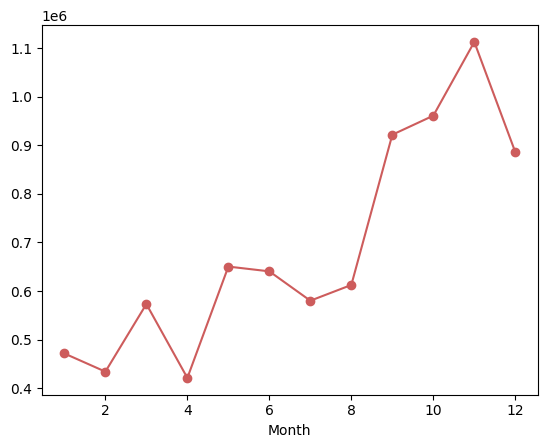

In [ ]:
df.groupby('Month')['Sales'].sum().plot(marker='o', linestyle='-',color='indianred')

<Axes: xlabel='Day of Week'>

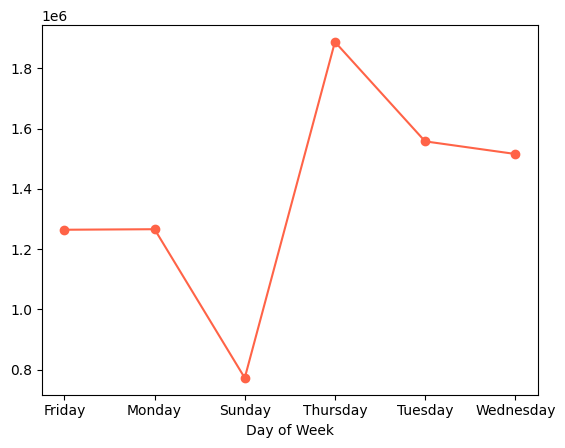

In [ ]:
df.groupby('Day of Week')['Sales'].sum().plot(marker='o', linestyle='-',color='tomato')

<Axes: xlabel='Quarter'>

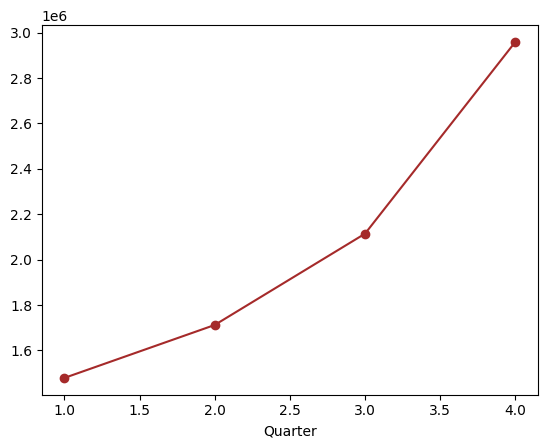

In [ ]:
df.groupby('Quarter')['Sales'].sum().plot(marker='o', linestyle='-',color='brown')

<Axes: xlabel='Hour'>

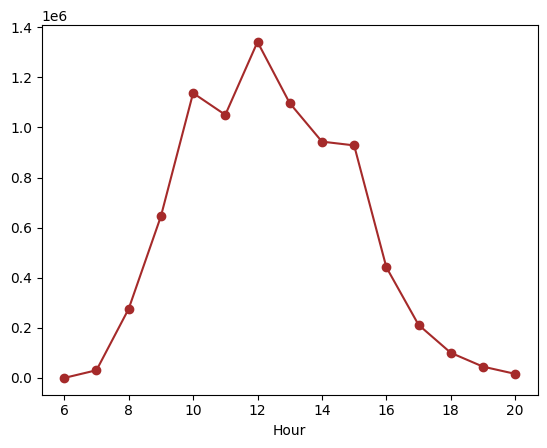

In [ ]:
df.groupby('Hour')['Sales'].sum().plot(marker='o', linestyle='-',color='brown')

<Axes: xlabel='Day'>

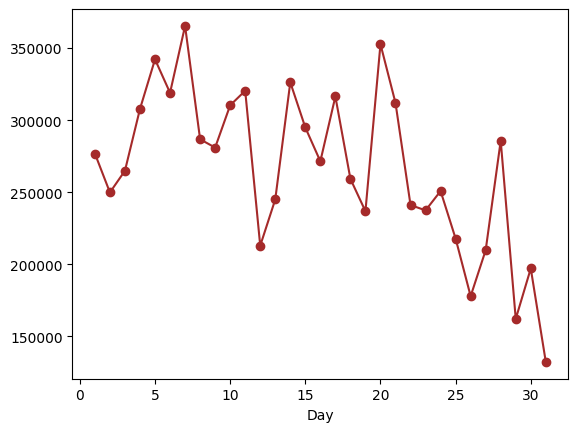

In [ ]:
df.groupby('Day')['Sales'].sum().plot(marker='o', linestyle='-',color='brown')

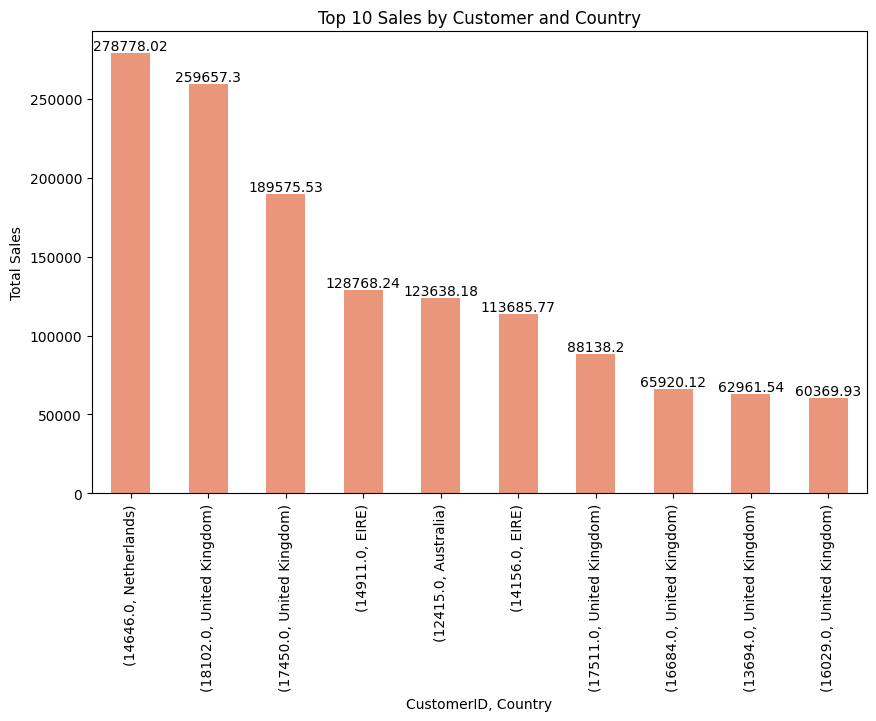

In [ ]:
# Assuming df is your DataFrame
top_sales_data = df.groupby(['CustomerID', 'Country'])['Sales'].sum().sort_values(ascending=False).head(10)

# Plotting
ax = top_sales_data.plot(kind='bar', color='darksalmon', figsize=(10, 6))
plt.title('Top 10 Sales by Customer and Country')
plt.xlabel('CustomerID, Country')
plt.ylabel('Total Sales')

# Displaying sales values on top of each bar
for idx, value in enumerate(top_sales_data):
    ax.text(idx, value + 0.5, str(round(value, 2)), ha='center', va='bottom', rotation=0)

plt.show()


<Axes: xlabel='CustomerID,Country'>

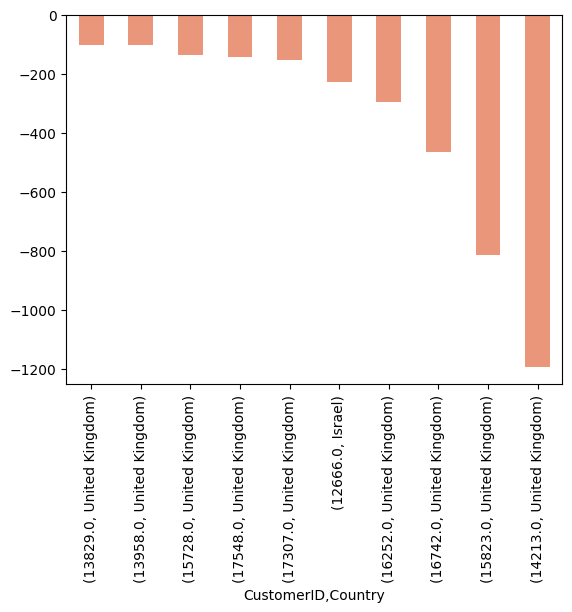

In [ ]:
df.groupby(['CustomerID', 'Country'])['Sales'].sum().sort_values(ascending=False).tail(10).plot(kind='bar',color='darksalmon')

<Axes: xlabel='Description'>

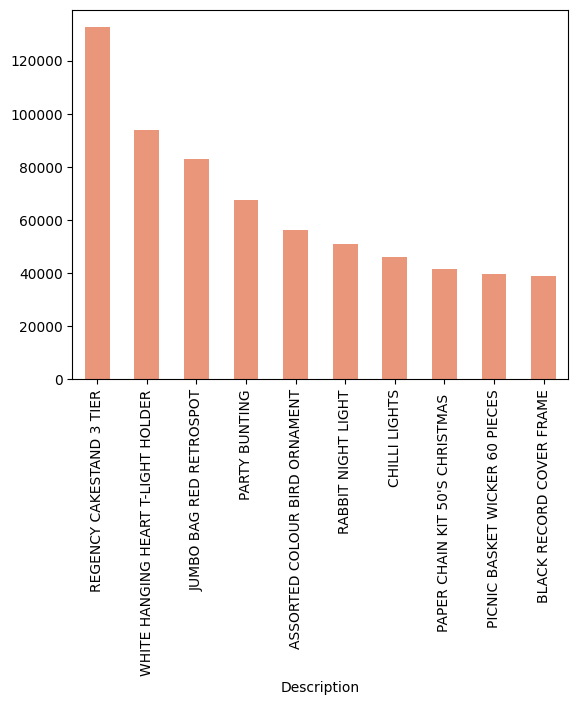

In [ ]:
df.groupby(['Description'])['Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='darksalmon')

<Axes: xlabel='Description'>

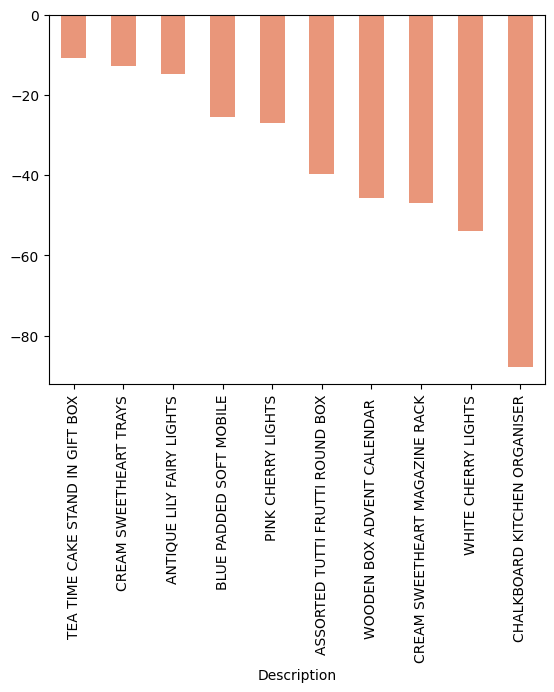

In [ ]:
df.groupby(['Description'])['Sales'].sum().sort_values(ascending=False).tail(10).plot(kind='bar',color='darksalmon')

<Axes: xlabel='Description'>

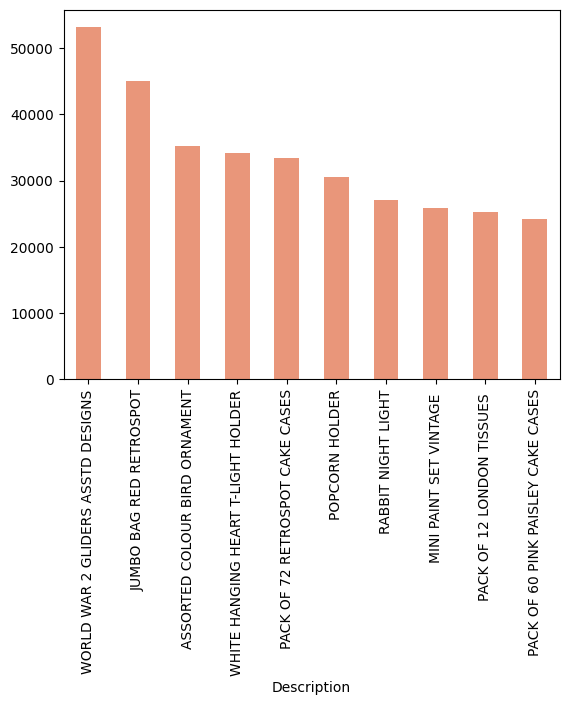

In [ ]:
df.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='darksalmon')

<Axes: xlabel='Description'>

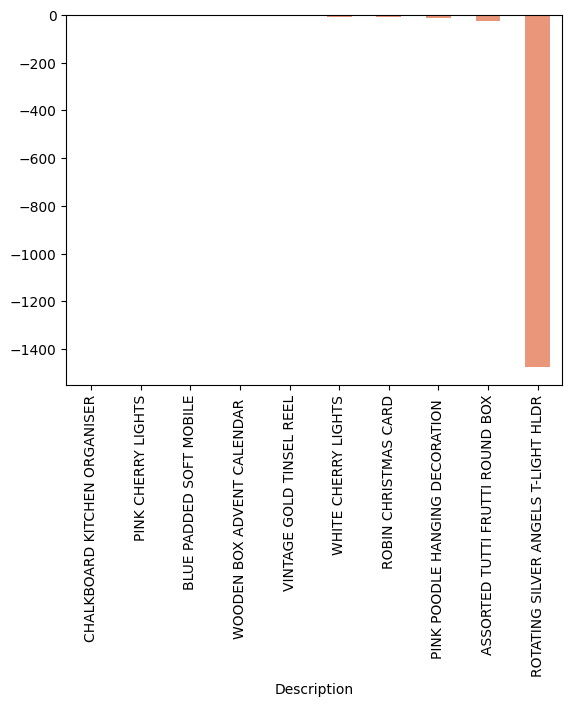

In [ ]:
df.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False).tail(10).plot(kind='bar',color='darksalmon')

<Axes: xlabel='Description'>

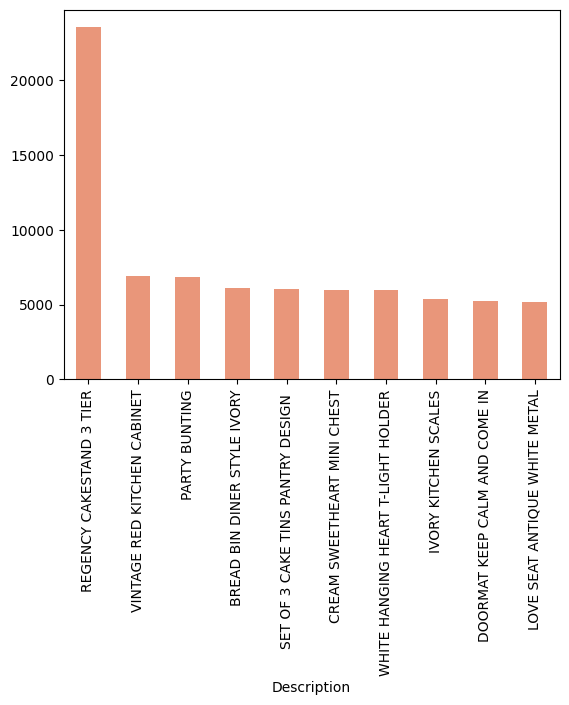

In [ ]:
df.groupby(['Description'])['UnitPrice'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='darksalmon')

<Axes: xlabel='Description'>

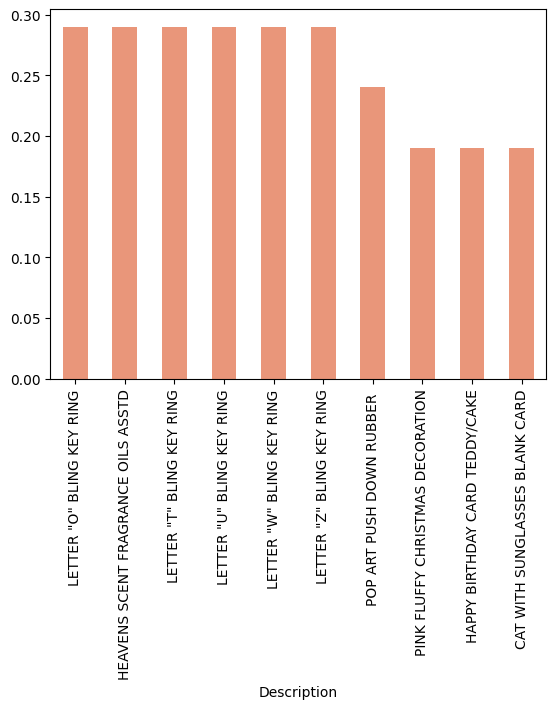

In [ ]:
df.groupby(['Description'])['UnitPrice'].sum().sort_values(ascending=False).tail(10).plot(kind='bar',color='darksalmon')

In [ ]:
df.groupby(['Country']).agg({'Quantity': 'sum', 'Sales': 'sum'}).reset_index().sort_values(by='Sales',ascending=False)

,Country,Quantity,Sales
35,United Kingdom,3979786,6801336.58
23,Netherlands,199934,283479.54
10,EIRE,135842,246732.47
14,Germany,116233,200616.66
13,France,109016,181385.54
0,Australia,83335,136922.50
32,Switzerland,29680,51859.40
30,Spain,26600,51746.65
3,Belgium,22880,36662.96
19,Japan,25221,35419.79


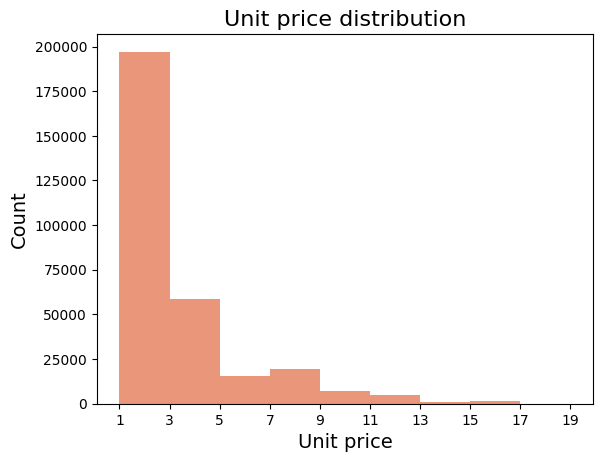

In [ ]:
bins = np.arange(1, 21, 2)
ticks = np.arange(1, 21, 2)
plt.hist(data=df, x='UnitPrice', bins=bins, color='darksalmon')
plt.xticks(ticks, ticks)
plt.xlabel('Unit price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Unit price distribution', fontsize=16);

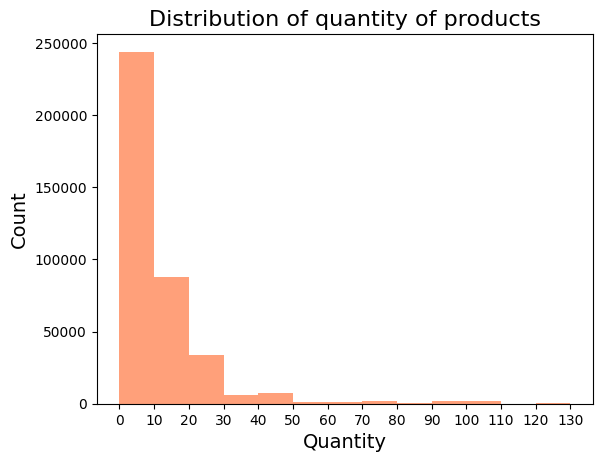

In [ ]:
bins = np.arange(0, 140, 10)
ticks = np.arange(0, 140, 10)
plt.hist(data=df, x='Quantity', bins=bins, color='lightsalmon')
plt.xticks(ticks, ticks)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of quantity of products', fontsize=16);

# XGboost
Step_1: Subet a cohort

Step_2 : Temporal Spliiting

step _3 : RFM features

Step_4: 2 Prediction models

In [ ]:
df=df[df['Country']=='United Kingdom']

In [ ]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [ ]:
df['InvoiceDate'].max()

Timestamp('2011-11-30 17:42:00')

In [ ]:
in_df=df[df['InvoiceDate']<'2011-11-01']
out_df=df[df['InvoiceDate']>'2011-11-01']

In [ ]:
in_df['InvoiceDate'].min(),in_df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-10-31 17:13:00'))

In [ ]:
out_df['InvoiceDate'].min(),out_df['InvoiceDate'].max()

(Timestamp('2011-11-01 08:16:00'), Timestamp('2011-11-30 17:42:00'))

In [ ]:
in_df['CustomerID'].nunique(),out_df['CustomerID'].nunique()

(3613, 1544)

# Feature Engineering for Xgboost

## RFM Features

RFM Analysis

Here, you are going to perform following opertaions:

    For Recency, Calculate the number of days between present date and date of last purchase each customer.
    For Frequency, Calculate the number of orders for each customer.
    For Monetary, Calculate sum of purchase price for each customer, Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value..

In [ ]:
import datetime as dt
PRESENT = dt.datetime(2011,8,31)

In [ ]:
customer_df = in_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (PRESENT - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'Sales': ['sum', 'min', 'max','mean','std'],  # Monetary (sum, min, max,mean)
    'Quantity': 'sum',
    'StockCode': pd.Series.nunique
})

customer_df.columns = ['Recency', 'Frequency', 'Monetary_Sum', 'Monetary_Min', 'Monetary_Max','Monetary_Mean','Monetary_std','Quantity','Unique_Products']

# Convert Recency to integer
customer_df['Recency'] = customer_df['Recency'].astype(int)
customer_df.reset_index(inplace=True)

In [ ]:
customer_df['weighed_RFM']=0.105*customer_df['Recency']+0.637*customer_df['Frequency']+0.258*customer_df['Monetary_Sum']

In [ ]:
customer_df.head()

,CustomerID,Recency,Frequency,Monetary_Sum,Monetary_Min,Monetary_Max,Monetary_Mean,Monetary_std,Quantity,Unique_Products,weighed_RFM
0,12346.0,224,2,0.00,-77183.60,77183.60,0.000000,109154.093913,0,1,24.79400
1,12747.0,-35,85,3444.78,10.20,243.00,40.526824,45.445108,1070,38,939.22324
2,12748.0,-57,2550,20564.01,-179.00,377.00,8.064318,18.122165,15436,1376,6923.87958
3,12749.0,12,160,2532.55,-19.90,114.75,15.828438,16.193386,1031,113,756.57790
4,12820.0,-57,47,731.99,6.96,24.90,15.574255,4.609341,607,47,212.80742


In [ ]:
# Calculate the total number of transactions made by each customer
total_transactions = in_df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = in_df[in_df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

# Merge the Cancellation Frequency data into the customer_data dataframe
customer_df = pd.merge(customer_df, cancellation_frequency, on='CustomerID', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_df['Cancellation_Frequency'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
customer_df['Cancellation_Rate'] = customer_df['Cancellation_Frequency'] / total_transactions['InvoiceNo']

# Display the first few rows of the customer_data dataframe
customer_df.head()

,CustomerID,Recency,Frequency,Monetary_Sum,Monetary_Min,Monetary_Max,Monetary_Mean,Monetary_std,Quantity,Unique_Products,weighed_RFM,Cancellation_Frequency,Cancellation_Rate
0,12346.0,224,2,0.00,-77183.60,77183.60,0.000000,109154.093913,0,1,24.79400,1.0,0.500000
1,12747.0,-35,85,3444.78,10.20,243.00,40.526824,45.445108,1070,38,939.22324,0.0,0.000000
2,12748.0,-57,2550,20564.01,-179.00,377.00,8.064318,18.122165,15436,1376,6923.87958,8.0,0.049689
3,12749.0,12,160,2532.55,-19.90,114.75,15.828438,16.193386,1031,113,756.57790,3.0,0.500000
4,12820.0,-57,47,731.99,6.96,24.90,15.574255,4.609341,607,47,212.80742,0.0,0.000000


In [ ]:
customer_df.shape

(3613, 13)

In [ ]:
outTable = out_df.groupby('CustomerID')['Sales'].sum().reset_index().rename({'Sales':'Total_Sales_3M'},axis=1)

In [ ]:
outTable.head()

,CustomerID,Total_Sales_3M
0,12747.0,312.73
1,12748.0,8257.83
2,12749.0,522.59
3,12826.0,279.50
4,12827.0,100.95


In [ ]:
outTable[outTable['Total_Sales_3M']==0]

,CustomerID,Total_Sales_3M
1230,17193.0,0.0


In [ ]:
customer_df_2 = in_df.groupby([
            'CustomerID',
            pd.Grouper(key='InvoiceDate', freq='3M')]).agg({
            'Sales': ['sum','mean','count','std']
             })

In [ ]:
customer_df_2.columns = ['_'.join(col).lower() for col in customer_df_2.columns]

In [ ]:
customer_df_2 = customer_df_2.reset_index()

In [ ]:
customer_df_2.head()

,CustomerID,InvoiceDate,sales_sum,sales_mean,sales_count,sales_std
0,12346.0,2011-03-31,0.00,0.000000,2,109154.093913
1,12747.0,2010-12-31,706.27,47.084667,15,47.940730
2,12747.0,2011-03-31,613.82,36.107059,17,43.391589
3,12747.0,2011-06-30,1147.61,37.019677,31,38.675728
4,12747.0,2011-09-30,301.70,43.100000,7,53.164274


In [ ]:
map_date_month = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
                    sorted(customer_df_2.reset_index()['InvoiceDate'].unique(), reverse=True))}

In [ ]:
customer_df_2['M'] = customer_df_2['InvoiceDate'].apply(lambda x: map_date_month[str(x)[:10]])

In [ ]:
customer_df_2.head()

,CustomerID,InvoiceDate,sales_sum,sales_mean,sales_count,sales_std,M
0,12346.0,2011-03-31,0.00,0.000000,2,109154.093913,M_4
1,12747.0,2010-12-31,706.27,47.084667,15,47.940730,M_5
2,12747.0,2011-03-31,613.82,36.107059,17,43.391589,M_4
3,12747.0,2011-06-30,1147.61,37.019677,31,38.675728,M_3
4,12747.0,2011-09-30,301.70,43.100000,7,53.164274,M_2


In [ ]:
customer_df_2['M'].value_counts()

M
M_2    1958
M_3    1826
M_4    1623
M_1    1283
M_5     870
Name: count, dtype: int64

In [ ]:
customer_df_2 = pd.pivot_table(data=customer_df_2,
                values=['sales_sum', 'sales_mean', 'sales_count','sales_std'],
                columns='M',
                index='CustomerID')

In [ ]:
customer_df_2.reset_index()

CustomerID sales_count                             sales_mean             \
M                       M_1    M_2    M_3    M_4    M_5        M_1        M_2   
0       12346.0         NaN    NaN    NaN    2.0    NaN        NaN        NaN   
1       12747.0        15.0    7.0   31.0   17.0   15.0  45.025333  43.100000   
2       12748.0       208.0  765.0  601.0  328.0  648.0  10.333173  10.140471   
3       12749.0         NaN  106.0   54.0    NaN    NaN        NaN  16.513679   
4       12820.0        22.0   14.0    NaN   11.0    NaN  15.625455  15.555000   
...         ...         ...    ...    ...    ...    ...        ...        ...   
3608    18280.0         NaN    NaN    NaN   10.0    NaN        NaN        NaN   
3609    18281.0         NaN    NaN    7.0    NaN    NaN        NaN        NaN   
3610    18282.0         NaN    8.0    NaN    NaN    NaN        NaN  12.345000   
3611    18283.0        38.0  101.0  191.0  130.0    NaN   2.973421   2.681089   
3612    18287.0        41.0    NaN   29.0    NaN    NaN  26.146341        NaN   

                            ...  sales_std                        \
M           M_3        M_4  ...        M_1        M_2        M_3   
0           NaN   0.000000  ...        NaN        NaN        NaN   
1     37.019677  36.107059  ...  58.333174  53.164274  38.675728   
2      7.983827   5.386128  ...  26.139383  24.036698  12.703606   
3     14.483333        NaN  ...        NaN  17.527607  13.238473   
4           NaN  15.496364  ...   4.396740   5.507814        NaN   
...         ...        ...  ...        ...        ...        ...   
3608        NaN  18.060000  ...        NaN        NaN        NaN   
3609  11.545714        NaN  ...        NaN        NaN   6.110444   
3610        NaN        NaN  ...        NaN   7.251934        NaN   
3611   2.593665   2.420769  ...   3.286609   2.213797   1.882902   
3612  26.388966        NaN  ...  20.460189        NaN  19.061310   

                               sales_sum                                      
M               M_4        M_5       M_1      M_2      M_3      M_4      M_5  
0     109154.093913        NaN       NaN      NaN      NaN     0.00      NaN  
1         43.391589  47.940730    675.38   301.70  1147.61   613.82   706.27  
2          9.719338  13.496296   2149.30  7757.46  4798.28  1766.65  4092.32  
3               NaN        NaN       NaN  1750.45   782.10      NaN      NaN  
4          4.205490        NaN    343.76   217.77      NaN   170.46      NaN  
...             ...        ...       ...      ...      ...      ...      ...  
3608       3.380319        NaN       NaN      NaN      NaN   180.60      NaN  
3609            NaN        NaN       NaN      NaN    80.82      NaN      NaN  
3610            NaN        NaN       NaN    98.76      NaN      NaN      NaN  
3611       1.799190        NaN    112.99   270.79   495.39   314.70      NaN  
3612            NaN        NaN   1072.00      NaN   765.28      NaN      NaN  

[3613 rows x 21 columns]

In [ ]:
customer_df_2.columns = ['_'.join(col) for col in customer_df_2.columns]

In [ ]:
customer_df_2.reset_index(level=0, inplace=True)

In [ ]:
customer_df_2.fillna(0, inplace=True)

In [ ]:
customer_df_2.isnull().sum().sum()

0

In [ ]:
customer_df_2.head()

,CustomerID,sales_count_M_1,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_mean_M_1,sales_mean_M_2,sales_mean_M_3,sales_mean_M_4,...,sales_std_M_1,sales_std_M_2,sales_std_M_3,sales_std_M_4,sales_std_M_5,sales_sum_M_1,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
0,12346.0,0.0,0.0,0.0,2.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,109154.093913,0.000000,0.00,0.00,0.00,0.00,0.00
1,12747.0,15.0,7.0,31.0,17.0,15.0,45.025333,43.100000,37.019677,36.107059,...,58.333174,53.164274,38.675728,43.391589,47.940730,675.38,301.70,1147.61,613.82,706.27
2,12748.0,208.0,765.0,601.0,328.0,648.0,10.333173,10.140471,7.983827,5.386128,...,26.139383,24.036698,12.703606,9.719338,13.496296,2149.30,7757.46,4798.28,1766.65,4092.32
3,12749.0,0.0,106.0,54.0,0.0,0.0,0.000000,16.513679,14.483333,0.000000,...,0.000000,17.527607,13.238473,0.000000,0.000000,0.00,1750.45,782.10,0.00,0.00
4,12820.0,22.0,14.0,0.0,11.0,0.0,15.625455,15.555000,0.000000,15.496364,...,4.396740,5.507814,0.000000,4.205490,0.000000,343.76,217.77,0.00,170.46,0.00


In [ ]:
customer_df_3 = pd.merge(customer_df, customer_df_2, on='CustomerID', how='left')

In [ ]:
customer_df_3.head()

,CustomerID,Recency,Frequency,Monetary_Sum,Monetary_Min,Monetary_Max,Monetary_Mean,Monetary_std,Quantity,Unique_Products,...,sales_std_M_1,sales_std_M_2,sales_std_M_3,sales_std_M_4,sales_std_M_5,sales_sum_M_1,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
0,12346.0,224,2,0.00,-77183.60,77183.60,0.000000,109154.093913,0,1,...,0.000000,0.000000,0.000000,109154.093913,0.000000,0.00,0.00,0.00,0.00,0.00
1,12747.0,-35,85,3444.78,10.20,243.00,40.526824,45.445108,1070,38,...,58.333174,53.164274,38.675728,43.391589,47.940730,675.38,301.70,1147.61,613.82,706.27
2,12748.0,-57,2550,20564.01,-179.00,377.00,8.064318,18.122165,15436,1376,...,26.139383,24.036698,12.703606,9.719338,13.496296,2149.30,7757.46,4798.28,1766.65,4092.32
3,12749.0,12,160,2532.55,-19.90,114.75,15.828438,16.193386,1031,113,...,0.000000,17.527607,13.238473,0.000000,0.000000,0.00,1750.45,782.10,0.00,0.00
4,12820.0,-57,47,731.99,6.96,24.90,15.574255,4.609341,607,47,...,4.396740,5.507814,0.000000,4.205490,0.000000,343.76,217.77,0.00,170.46,0.00


In [ ]:
customer_df_3.shape

(3613, 33)

In [ ]:
customer_df_3.fillna(0, inplace=True)

#  Outlier Detection and Treatment

In [ ]:
from sklearn.ensemble import IsolationForest
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_df_3['Outlier_Scores'] = model.fit_predict(customer_df_3.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_df_3['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_df_3['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_df_3.head()

,CustomerID,Recency,Frequency,Monetary_Sum,Monetary_Min,Monetary_Max,Monetary_Mean,Monetary_std,Quantity,Unique_Products,...,sales_std_M_3,sales_std_M_4,sales_std_M_5,sales_sum_M_1,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,Outlier_Scores,Is_Outlier
0,12346.0,224,2,0.00,-77183.60,77183.60,0.000000,109154.093913,0,1,...,0.000000,109154.093913,0.000000,0.00,0.00,0.00,0.00,0.00,-1,1
1,12747.0,-35,85,3444.78,10.20,243.00,40.526824,45.445108,1070,38,...,38.675728,43.391589,47.940730,675.38,301.70,1147.61,613.82,706.27,1,0
2,12748.0,-57,2550,20564.01,-179.00,377.00,8.064318,18.122165,15436,1376,...,12.703606,9.719338,13.496296,2149.30,7757.46,4798.28,1766.65,4092.32,-1,1
3,12749.0,12,160,2532.55,-19.90,114.75,15.828438,16.193386,1031,113,...,13.238473,0.000000,0.000000,0.00,1750.45,782.10,0.00,0.00,1,0
4,12820.0,-57,47,731.99,6.96,24.90,15.574255,4.609341,607,47,...,0.000000,4.205490,0.000000,343.76,217.77,0.00,170.46,0.00,1,0


In [ ]:
outlier_percentage = customer_df_3['Is_Outlier'].value_counts(normalize=True) * 100

In [ ]:
outlier_percentage

Is_Outlier
0    94.990313
1     5.009687
Name: proportion, dtype: float64

In [ ]:
# Separate the outliers for analysis
outliers_data = customer_df_3[customer_df_3['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_df_3[customer_df_3['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned.shape[0]

3432

In [ ]:
df_merge = pd.merge(customer_df, outTable, on='CustomerID', how='left')

In [ ]:
df_merge.fillna(0, inplace=True)